In [1]:
import keras

Using TensorFlow backend.


In [2]:
num_words = 50000
maxlen = 500  # cut texts after this number of words
embedding_dim = 32

# Data Processing

In [3]:
from keras.datasets import reuters

(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

8982 train sequences
2246 test sequences


In [4]:
from keras.preprocessing import sequence

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [5]:
num_classes = max(y_train) + 1
print('# of Classes: ',num_classes)

# of Classes:  46


In [6]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# RNN Model Setup

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense, Activation

model = Sequential()
model.add(Embedding(num_words, embedding_dim))
model.add(SimpleRNN(embedding_dim, return_sequences=True))
model.add(SimpleRNN(embedding_dim, return_sequences=True))
model.add(SimpleRNN(embedding_dim, return_sequences=True))
model.add(SimpleRNN(embedding_dim))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          1600000   
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                1518      
_________________________________________________________________
activation_2 (Activation)    (None, 46)                0         
Total para

In [11]:
batch_size = 64 # number of examples per batch
n_epochs = 10   # number of epochs to train - each epoch is a full pass in the entire trainset   
validation_split = 0.3  # split from the trainset to be used to compute validation scores - the accuracy on an independent set of examples

history = model.fit(input_train, y_train,
                    epochs=n_epochs,
                    batch_size=batch_size,
                    validation_split=validation_split)

Instructions for updating:
Use tf.cast instead.
Train on 6287 samples, validate on 2695 samples
Epoch 1/10
6287/6287 [==============================] - 22s 3ms/step - loss: 2.7897 - acc: 0.2963 - val_loss: 2.3930 - val_acc: 0.3532
Epoch 2/10
6287/6287 [==============================] - 21s 3ms/step - loss: 2.2523 - acc: 0.4339 - val_loss: 2.1926 - val_acc: 0.4375
Epoch 3/10
6287/6287 [==============================] - 22s 3ms/step - loss: 1.7841 - acc: 0.5626 - val_loss: 2.0190 - val_acc: 0.4876
Epoch 4/10
6287/6287 [==============================] - 23s 4ms/step - loss: 1.2705 - acc: 0.6897 - val_loss: 2.0282 - val_acc: 0.4909
Epoch 5/10
6287/6287 [==============================] - 22s 3ms/step - loss: 0.8876 - acc: 0.7864 - val_loss: 2.1086 - val_acc: 0.4976
Epoch 6/10
6287/6287 [==============================] - 23s 4ms/step - loss: 0.6396 - acc: 0.8568 - val_loss: 2.2389 - val_acc: 0.4883
Epoch 7/10
6287/6287 [==============================] - 22s 4ms/step - loss: 0.4852 - acc: 0.9

# Performance Plot

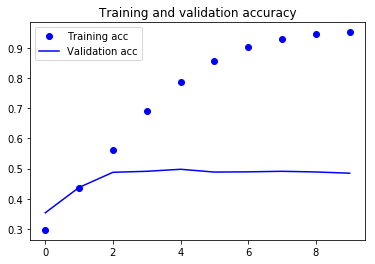

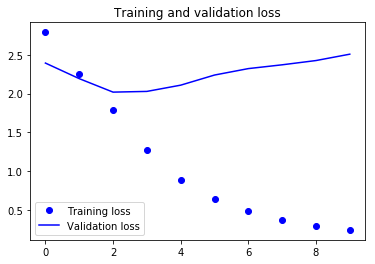

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()